# Exploratory Data Analysis & Feature Engineering

## Setting up Environment

In [48]:
# Internal Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# External Libraries
import os

In [49]:
# Importing the dataset as a pandas dataset ( Training ).
df = pd.read_csv('loan_train_cleaned.csv')

# Importing Testing Dataset for Feature Engineering Pipeline. 
df_test = pd.read_csv('loan_test_cleaned.csv')


In [50]:
# Are we loading in the Testing DataSet through Feature Engineering Pipeline
Testing = False

## Exploratory Data Analysis

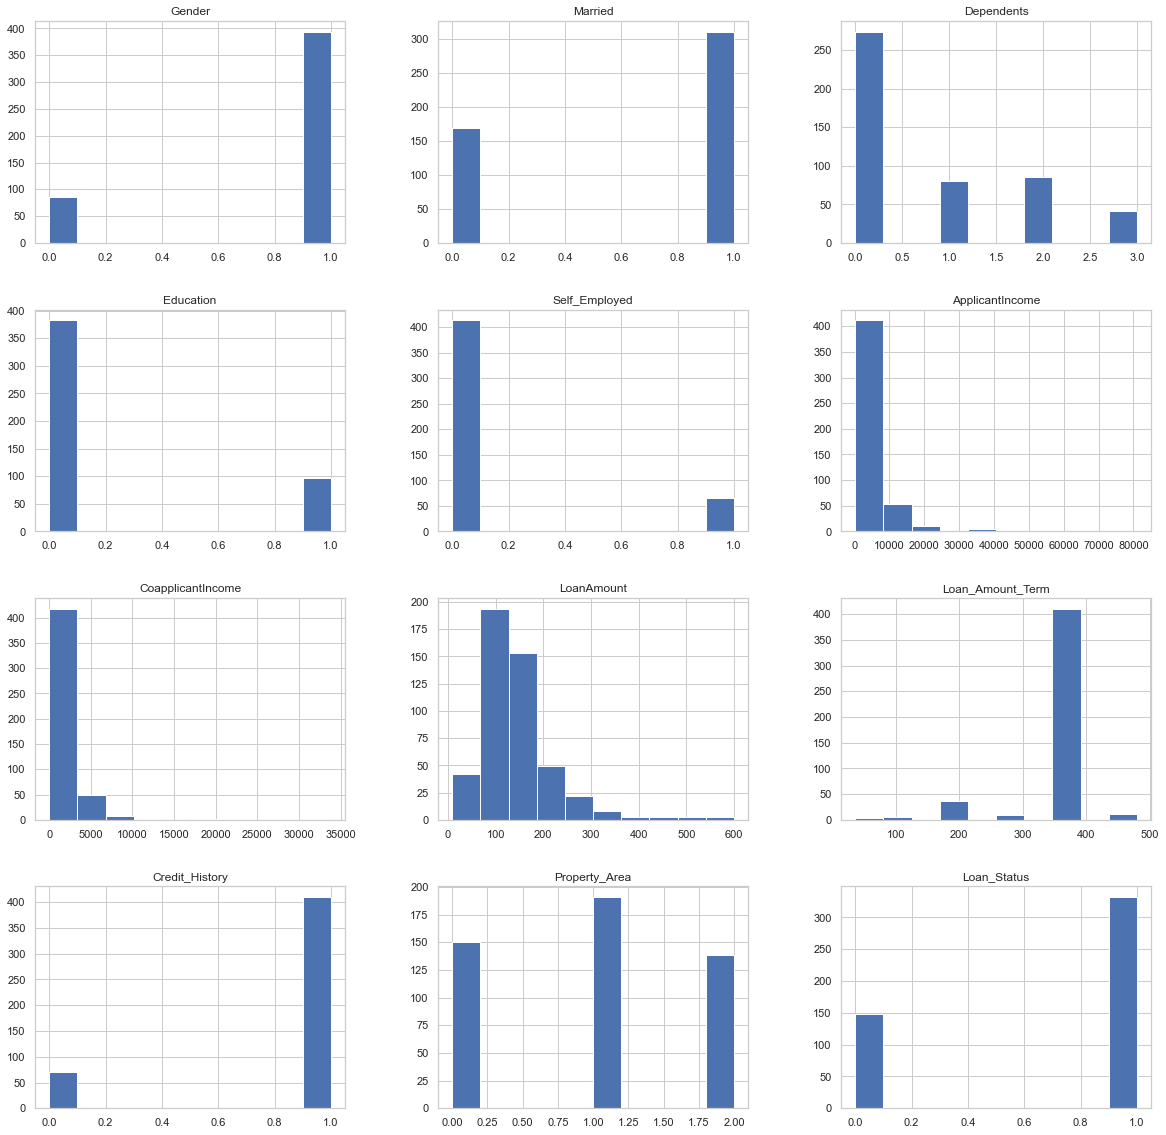

In [51]:
# Column Variables
df.hist(figsize=(20,20))
plt.show()


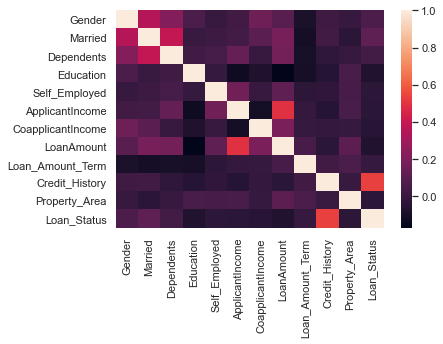

In [52]:
# plot Corralation Matrix
corr = df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()


In [53]:
#Plot Correlation with Loan_Status 
sns.set(style="whitegrid", color_codes=True)
sns.pairplot(df, hue="Loan_Status")
plt.show()


## Feature Engineering

In [54]:
if Testing:
    df = df_test

In [55]:
# Taking the Logarithim & Exponent of Applicaton_Income
df['log_app_income'] = np.log(df['ApplicantIncome'])
df['sqr_app_income'] = np.square(df['ApplicantIncome'])

C:\Users\12678\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [56]:
# Taking the Logarithm & Exponent of Coapplicant Income
df['log_coapp_income'] = np.log(df['CoapplicantIncome'])
df['sqr_coapp_income'] = np.square(df['CoapplicantIncome'])

In [57]:
# Taking the Logarithm & Exponent of Loan Amount
df['log_loan_amt'] = np.log(df['LoanAmount'])
df['sqr_loan_amt'] = np.square(df['LoanAmount'])

In [58]:
# Create New Features 
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['Total_Income_log'] = np.log(df['Total_Income'])
df['Total_Income_sqr'] = np.square(df['Total_Income'])

# Create Feature
df['Payability'] = df['Total_Income'] - df['LoanAmount']
df['Payability_log'] = np.log(df['Payability'])
df['Payability_sqr'] = np.square(df['Payability'])


## Synthetic Data

In [ ]:
df = df.sample(frac=12, replace=True)

In [61]:
# Removing Infinite Data from the dataset
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()

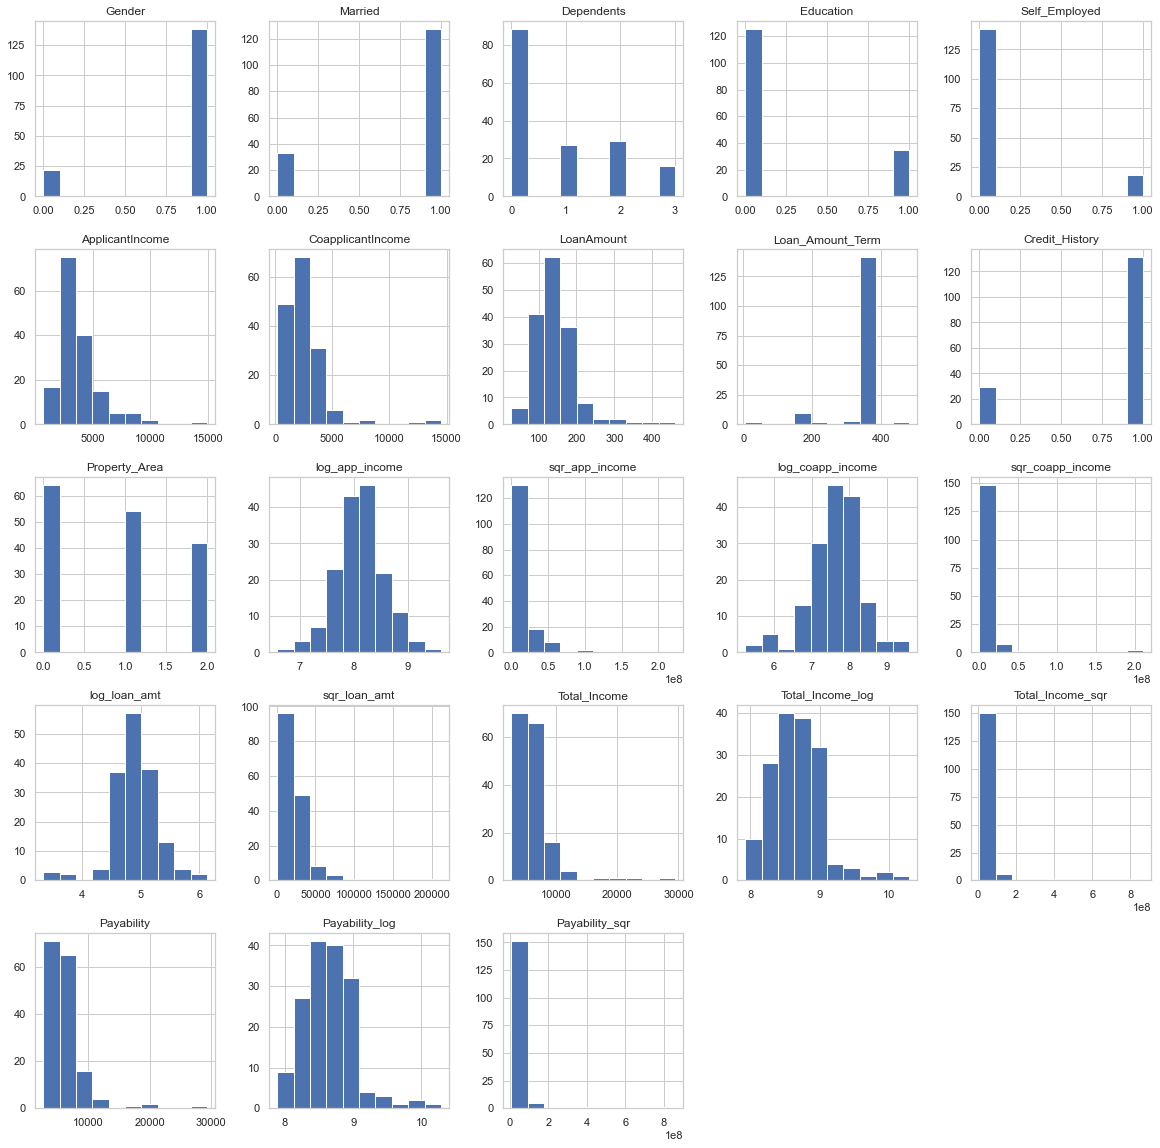

In [62]:
df.hist(figsize=(20,20))
plt.show()

## Exporting Data Sets

In [59]:
# Export Testing Data frame
if Testing: 
    df.to_csv('loan_testing_engineered.csv', index=False)

else:
    df.to_csv('loan_training_engineered.csv', index=False)
    